# Step3 演習02  TensorfFowチュートリアル
---

本チュートリアルは機械学習やディープラーニングのフレームワークTensorFlowを使ってMNISTの分類問題に取り組みます。

これから利用するTensorFlowは機械学習やディープラーニングに最適化されたフレームワークで、より簡単にモデルの実装を実現できます。

はじめにTensorFlowを使った基本的なコーディングを通して基本的なコーディングを身につけ、最後に手書き数字の画像データMNISTの多クラス分類を行います。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での利用は避けてください。

**本演習の目的**
- TensorFlowに触れ、使ってみる。
- TensorFlow特有の定数や変数の記述方法を学ぶ。
- TensorFlowでニューラルネットワークを構築し、MNISTの多クラス分類を実装してみる。

## ご案内

以降の演習において、TensorFlow や Keras を使った演習ファイルを用意していますが、自動採点は行いません。

重要な確認箇所については、下記のように指示があります。

**【確認１】**

```py
###############START CODE HERE###############
#適切な 関数・変数・値 などにNoneを書き換えてください。
def test():
    test =  None
    return test
################END CODE HERE################
```

回答はヒントページに記載しています。わからなかった場合は、ヒントを参考にコードを順に実装してください。

また、TensorFlowとKerasの演習ページの冒頭には必ず正解となる自動採点コードを用意しています。

以降のセルを実行する前に必ず実行をしてください。

**【課題１】** 採点を実行してください。

In [1]:
#Coursedele-02 Step3 QuestionNumber4 9e3898773d521e3f1932bd07362e4b71
print("この課題の採点は全員正解とします。")

この課題の採点は全員正解とします。


** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [2]:
%%bash
./validation_client.py dele-02 3 4 Step3_02.ipynb api.internal.zero2one.jp

Congraturation!
We give you 10 points out of 10 points.



## ライブラリのインポート

まずはじめに、本演習で利用するライブラリのインポートをします。ライブラリのインポートは作業を行うときには一番はじめに行うようにしましょう。

- [NumPy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [Matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [TensorFlow](https://www.tensorflow.org/) TensorFlow公式ドキュメント

TensorFlowを使うときは一般的に、「import tensorflow as tf」 とはじめに宣言します。

In [3]:
#ライブラリのインポート
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

上記のセルを実行したことで、TensorFlowを使う準備が整いました。では、コードを下記のコードを順番に実行してみましょう。

## 定数テンソルの作成

データの値や形状が決まっているときには、定数テンソルを使用します。tf.zeros([row_dim, col_dim])は** row_dim ** と ** col_dim **にたとえば(5, 3)と値を与えることで０だけからなる5行3列の行列を作ることができます。

In [4]:
zeros = tf.zeros([5, 3])

作成したオペレーションを実行するには、sess = tf.Session() を記述することでセッションを作成し、sess.run()でオペレーションを実行します。

In [6]:
#セッションを作成
sess = tf.Session()
# 上のセルで作った"zeros"を実行
print(sess.run(zeros))
#セッションを終了
sess.close()

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


5行3列の０だけからなる行列出力されたはずです。

では、セッション終了後にオペレーションを実行した場合どのような結果になるのか確認してみましょう。下のセルを実行してください。

In [7]:
#セッションを作成
sess = tf.Session()
print(sess.run(zeros))
#セッションを終了
sess.close()
#セッション終了後のオペレーション実行されない
print(sess.run(zeros))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


RuntimeError: Attempted to use a closed Session.

上のセルでは、セッション終了後にオペレーションを実行しようとしたためエラーになってしまいます。

必ずセッション内に実行させたいコードは記述してください。

tf.constantは定数テンソルを作成することができます。下のセルを実行してみましょう。

In [8]:
#定数テンソルを作成
constant_tf = tf.constant([0, 1, 2, 3, 4, 5])
#セッションを作成
sess = tf.Session()
#オペレーションを実行
print(sess.run(constant_tf))
#セッションを終了
sess.close()

[0 1 2 3 4 5]


## プレースホルダー（placeholder）

placeholderは特定の形や型をもつ箱です。下のセルの場合、add_opはfeed_dictに辞書型のオブジェクト({})を与えることでテンソルa,bに値を渡しています。

In [9]:
# 入力データ
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])

#プレースホルダーを作成
a = tf.placeholder(tf.float32, shape=[3, ])
b = tf.placeholder(tf.float32, shape=[3, ])

#足し算のオペレーション
add_op = tf.add(a, b) 
 
#セッションを作成
sess = tf.Session()
#セッションを実行
print(sess.run(add_op, feed_dict={a:x1, b:x2}))
#セッションを終了
sess.close()

[5. 7. 9.]


形状が変化する場合や不明な場合には placeholder の shape を None とします。

In [10]:
#プレースホルダーを作成
x = tf.placeholder(tf.float32, shape=[None, None])

#8行4列の乱数を生成
x_vals = np.random.rand(8, 4)

#セッションを作成
sess = tf.Session()

#sessを実行
#ここではxに値を渡します。feed_dictでは辞書型でプレースホルダーに値を渡します。
print(sess.run(x, feed_dict={x:x_vals}))

#セッションを終了
sess.close()

[[0.56465626 0.9176212  0.9918288  0.48419696]
 [0.4136229  0.569998   0.8199734  0.3481312 ]
 [0.65283877 0.03750031 0.0603468  0.36001727]
 [0.28901467 0.50074    0.7765269  0.8037076 ]
 [0.81425226 0.8664388  0.5938568  0.6921788 ]
 [0.5713067  0.1297348  0.15557954 0.28375548]
 [0.9681623  0.8987274  0.05830963 0.52807474]
 [0.81135476 0.4437738  0.75750023 0.5609942 ]]


## 変数（variable）

変数テンソルを作成するには、tf.variable()を使用します。tf.variable()は、入力としてテンソルを受け取り変数を出力します。

tf.variable()をプログラム上で実行する際は、変数を初期化 ** global_variables_initializer() ** する必要があります。下のセルを実行してください。

In [11]:
#変数テンソルを作成
var = tf.Variable(0)
#定数テンソルを作成
x = tf.constant(2)

#足し算のオペレーション
add_op = tf.add(var, x)

#"add_op"の結果を変数に代入
assign_op = tf.assign(var, add_op)

#セッションを作成
with tf.Session() as sess:
    #変数を初期化
    #下の１行をコメントアウトすることで挙動の違いを確認してみてください。
    sess.run(tf.global_variables_initializer())
    for i in range(5):
        print(sess.run(assign_op))

2
4
6
8
10


今回の例ではまずはじめに変数を0で初期化しtf.assign でtf.add() の演算結果を新たな変数として var に代入しています。これを5回繰り返しています。

## 行列をつくって演算をおこなってみる

定数テンソル（2次元配列の行列）を作成し、演算を行います。

### 行列の作成

下のセルで、a, b, c で定義される行列を作成します。
- tf.diag()：任意の定数の対角成分を持つテンソルを作成
- tf.fill()：任意の定数のテンソルを作成
- tf.random_uniform：ランダムな値をもつ定数テンソルを作成

In [12]:
a = tf.diag([1., 2., 3.])
b = tf.fill([3, 2], 10.)
c = tf.random_uniform([3,2])
sess = tf.Session()
print("aの行列")
print(sess.run(a))
print("bの行列")
print(sess.run(b))
print("cの行列")
print(sess.run(c))

aの行列
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
bの行列
[[10. 10.]
 [10. 10.]
 [10. 10.]]
cの行列
[[0.18836701 0.59811807]
 [0.68526125 0.55450785]
 [0.78834534 0.8127433 ]]


作成した行列 a,b,c を使って、行列演算を行ってみます。

### 行列の足し算

In [14]:
sess = tf.Session()
print(sess.run(tf.add(b, c)))
sess.close()

[[10.473225 10.646978]
 [10.238447 10.588563]
 [10.545839 10.353107]]


### 行列の引き算

In [15]:
sess = tf.Session()
print(sess.run(tf.subtract(b, c)))
sess.close()

[[9.3300295 9.996277 ]
 [9.720004  9.750545 ]
 [9.832621  9.514073 ]]


### 行列の掛け算

In [16]:
sess = tf.Session()
print(sess.run(tf.matmul(a, b)))
sess.close()

[[10. 10.]
 [20. 20.]
 [30. 30.]]


### 行列の成分どうしの掛け算

In [17]:
sess = tf.Session()
print(sess.run(tf.multiply(b, b)))
sess.close()

[[100. 100.]
 [100. 100.]
 [100. 100.]]


以上で、TensorFlowの基本的な使い方を学習しました。これまで紹介した手法はTensorFlowの一部です。

さらなる技術を身につけたい場合はドキュメントを参考にしながら挑戦しましょう。

---

# MNIST多クラス分類の実装

ここからはTensorFlowを使いニューラルネットワークのモデルを構築し、MNISTの多クラス分類の実装を行ないます。TensorFlowを使ったモデルの構築手順や方法を学習します。

## ライブラリのインポート

改めてライブラリのインポートを行なっておきます。

In [18]:
# ライブラリのインポート
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## データセットの準備

この演習では "MNIST" と呼ばれる手書き数字のデータを用います。28ピクセル×28ピクセルのグレースケール画像が学習用データとして55,000枚、テスト用データとして10,000枚含まれています。今回はTensorFlowで用意されている関数からデータを読み込みます。

read_data_setsの引数は
1. ファイルの保存場所
2. one_hot: one-hotベクトル化するかどうか
3. validation_size: 検証用データの枚数、今回は訓練データとテストデータのみ使用します
4. source_url: データセットのダウンロード元

使用しているネットワークの強さによりロードに多少時間がかかる場合があります。

In [19]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


ダウンロードしたデータセットを**訓練データ**と**テストデータ**にそれぞれ定義しておきます。

In [20]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

print("X_train：訓練データ")
print("y_train：訓練データの正解ラベル")
print("X_test：テストデータ")
print("y_test：テストデータの正解ラベル")

X_train：訓練データ
y_train：訓練データの正解ラベル
X_test：テストデータ
y_test：テストデータの正解ラベル


訓練データとテストデータのshapeを確認します。

In [21]:
print("訓練データ数：{}".format(X_train.shape[0]))
print("訓練データ数の特徴（ピクセル）：{}".format(X_train.shape[1]))
print("テストデータ数：{}".format(X_test.shape[0]))
print("テストデータ数の特徴（ピクセル）：{}".format(X_test.shape[1]))

訓練データ数：55000
訓練データ数の特徴（ピクセル）：784
テストデータ数：10000
テストデータ数の特徴（ピクセル）：784


"X_train：訓練データ"は、学習用データの55000枚の画像データを行列にしたもの（28×28=784）として格納されています。

同様に、"X_test：テストデータ"は、テスト用データの10000枚の画像データを行列にしたもの（28×28=784）として格納されています。

### データの視覚化

ここで学習データの画像をランダムに表示させてみます。セルを実行するたびに画像が変わります。

数字：8


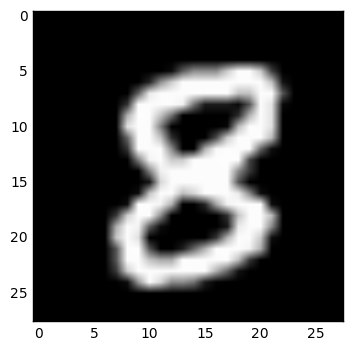

In [22]:
num = np.random.randint(0, len(mnist.train.images))
plt.imshow(mnist.train.images[num].reshape(28, 28), cmap='gray')
print("数字：{}".format(np.argmax(mnist.train.labels[num])))

次に正解ラベルを見てみます。正解ラベルとなる y_train のshapeは(55000,10)です。次のセルを実行して訓練データとテストデータの正解ラベルのデータの性質を確認します。

In [23]:
print("訓練データの正解ラベル数：{}".format(y_train.shape[0]))
print("訓練データ数の正解ラベルの配列数：{}".format(y_train.shape[1]))
print("テストデータの正解ラベル数：{}".format(y_test.shape[0]))
print("テストデータ数の正解ラベルの配列数：{}".format(y_test.shape[1]))

訓練データの正解ラベル数：55000
訓練データ数の正解ラベルの配列数：10
テストデータの正解ラベル数：10000
テストデータ数の正解ラベルの配列数：10


訓練データの場合、正解ラベル数は55000となっており、それぞれに対して答えとなるラベル部分には「１」が与えられています。下のセルを実行してみましょう。

In [24]:
y_train[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

例えば、数字の０に対応する正解ラベルは配列の0番目に１がはいっています。数字の1に対応するラベルには配列の1番目に1がはいっています。３以降も同様のルールです。下の画像はこれらのルールを可視化したものになります。
<p>

<div align="center"  style="width:50%">
<img src="./img/step3_mnist_label_019.png"></div>

### データセットのシャッフル

MNISTのデータセットをシャッフルします。データセットをそのまま使わずにシャッフルするのはなぜでしょうか。例えば、データがラベル(y)に対してソートされていたとします。すると、そのまま冒頭3000サンプルを取って学習に使うと、0, 1と書いてあるデータばかりが集まってしまうことになってしまいます。一見分からないような規則でソートされている可能性もあるので、データセットの順番がバラバラに見えても必ず最初にシャッフルしましょう。

In [25]:
#データセットのシャッフル
permutation = np.random.permutation(mnist.train.images.shape[0])
X_train = mnist.train.images[permutation]
y_train = mnist.train.labels[permutation]

### データセットの正規化

データセット全体が平均0.0，分散1.0となるように正規化します。

In [26]:
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

## ニューラルネットワークモデル

入力層のユニット数は特徴の数である784個、出力層は0~9の数字の１０クラス、隱れ層のユニット数は100個とします。
<br>
今回は下に示すネットワークのモデルを構築します。

- 入力層のユニット数784個
- 隠れ層のユニット数100個
- 出力層のユニット数10個

**モデル**:
<div style="width:40%">
<img src="./img/step3_mlp_784-10.png"><div>

## データのサイズ

あらかじめデータセットのサイズが分かっている場合は変数として定義しておきます。

もしなんらかの変更があった場合、一部分だけを変更することで対処することができるようになります。

あらかじめ定義しておくパラメータは経験的にわかってきます。徐々に慣れていきましょう。

In [29]:
# MNISTの画像の１辺のピクセル
img_size = 28

# MNISTの画像 28×28ピクセル = 784ピクセル
img_size_flat = img_size * img_size

# クラスの数
num_classes = 10

#隠れ層
hidden_layer =100

## 入力データと正解ラベル

** x（入力データ） **は、MNISTの入力画像は784次元（ピクセル）の平坦化されたデータを任意の個数入力したいので、shape [None, 784] を持つ浮動小数点数値の2次元テンソルとします。（None は次元が任意の長さを取りうることを意味しています。）<br>
** y(正解ラベル) **は、MNISTの正解ラベルです。正解ラベルは10クラスのため、shape [None, 10]を持つ浮動小数点数値の2次元テンソルとします。 

** Note： **<br>
- 入力データと正解ラベルには箱である Placeholder を使います。大量のデータを取り扱うニューラルネットワークの学習ではミニバッチで学習を行うことが多いため常に入力データの個数が変化しても対応できるようにします。
- 入力データの784ピクセルのshapeはデータのサイズで用意した「img_size_flat」を使うことができます。
- 正解ラベルの10クラスのshapeはデータのサイズで用意した「num_classes」を使うことができます。

In [30]:
#入力データ
x = tf.placeholder(tf.float32, shape=[None, img_size_flat])
#正解ラベル
y = tf.placeholder(tf.float32, [None, num_classes])

## パラメータの初期化

重みwを平均0.0，分散1.0となるように初期化します。正規分布のランダムな値の生成はTensorFlowの** tf.truncated_normal **を使うことができます。バイアスbは０で定数初期化します。

- 重みとバイアスには、状態を保持し更新する** tf.Variable ** を使います。
- 重みの初期化は次のコードで実装します。[tf.truncated_normal](https://www.tensorflow.org/api_docs/python/tf/truncated_normal)：tf.truncated_normal([shape, shape], mean=0.0, stddev=1.0))
- バイアスbは、tf.zeros を使うことができます。

In [31]:
# 重みとバイアス
w1 = tf.Variable(tf.truncated_normal([img_size_flat, hidden_layer], mean=0.0, stddev=1.0))
b1 = tf.Variable(tf.zeros([hidden_layer]))
w2 = tf.Variable(tf.truncated_normal([hidden_layer, num_classes], mean=0.0, stddev=1.0))
b2 = tf.Variable(tf.zeros([num_classes]))

## モデル実装

モデルを実装します。隠れ層の活性化関数はシグモイド関数、出力層はソフトマックス関数にします。 TensorFlowではニューラルネットワークの活性化関数が用意されています。シグモイド関数の場合、** tf.nn.sigmoid ** で実装することができます。

[Neural Network:Activation Functions](https://www.tensorflow.org/api_guides/python/nn#Activation_Functions)


**フォワード**:
$$z^{(1)}=W^{(1)\top}x^{(1)}+b^{(1)}$$
$$a^{(1)}=sigmoid(z^{(1)})$$
$$z^{(2)}=W^{(2)\top}a^{(2)}+b^{(2)}$$
$$a^{(2)}=softmax(z^{(2)})$$

** ヒント： **
- 重みと入力データの演算は tf.matmul() を使用することができます。
- 隠れ層 シグモイド関数：tf.nn.sigmoid()を使用することができます。
- 出力層 ソフトマックス関数：tf.nn.softmax()を使用することができます。

In [32]:
# model
layer1_a = tf.nn.sigmoid(tf.matmul(x, w1) + b1)
layer2_a = tf.nn.softmax(tf.matmul(layer1_a, w2) + b2)

## コスト関数

コスト関数はクロスエントロピー関数にします。
- $\hat{y}$ はモデルの出力
- $y$ は正解ラベル

**コスト関数**：
$$C(w,b)=-\sum_{n=1}^{m}y_n{\log}\hat{y}_{n}$$

** Note： **
- $\sum$は tf.reduce_sum() を使うことでテンソルすべての要素を足し合わせます。
- $log$は tf.log()を使うことができます。

In [33]:
#コスト関数
cross_entropy = - tf.reduce_sum( y * tf.log(layer2_a))

## 最適化

TensorFlowのライブラリを使った最適化の実装を行います。

コスト関数を今回はSGDで最適化します。実装は、** tf.train.GradientDescentOptimizer().minimize() **で行います。

- `Optimizer`: [tf.train.GradientDescentOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer)
- tf.train.GradientDescentOptimizer()の引数には `learning_rate` を渡します。また、最適化したいコスト関数を`.mnimize(cross_entropy)`でtf.train.GradientDescentOptimizer()の後尾に書き加えます。

In [34]:
#学習率
learning_rate = 0.01

**【確認１】** 適切な 関数・変数・値 などにNoneを書き換えてください。

In [36]:
#最適化
Optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

### 正解率

ここでは精度を計算するコードを実装します。
- `correct_pred`: [tf.equal](https://www.tensorflow.org/api_docs/python/tf/equal)を使い予測結果と正解ラベルを比較します。この際に、まず両方とも[tf.argmax](https://www.tensorflow.org/api_docs/python/tf/argmax)を使いone-hot-vectorの最大値のインデックスを返させます。ここで、`axis=1`とするのを忘れないようにしてください。
- `accuracy`: `correct_pred`はbool型（[True, False, True...])となっているので[tf.cast](https://www.tensorflow.org/api_docs/python/tf/cast)を使ってtf.float32に変換させます。そして、[tf.reduce_mean](https://www.tensorflow.org/api_docs/python/tf/reduce_mean)を使って精度を求めます。

In [37]:
correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(layer2_a, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## Variableを初期化

** tf.global_variables_initializer() **を宣言してvariableを初期化します。ここでは宣言のみを行なっています。

**【確認２】** 適切な 関数・変数・値 などにNoneを書き換えてください。

In [39]:
# variablesを初期化
init = tf.global_variables_initializer()

## モデルの学習

エポック数、全データセットの数、バッチサイズを以下の通りにします。

In [40]:
#エポック数
epochs = 10
#データセットの数：55000
sample_size = X_train.shape[0]
#バッチサイズ
batch_size = 100

下のセルを実行し、モデルの学習を開始します。

In [41]:
#エポックの回数を初期化
count = 0

# コスト/精度を記録するための配列
train_data_cost = []
test_data_cost = []
train_data_acc = []
test_data_acc = []

#セッションを作成
with tf.Session() as sess:
    # variableを初期化
    sess.run(init)
    print('Training...')
    #エポック
    for i in range(epochs):
        #ミニバッチ
        for i in range(0, sample_size, batch_size):
            # ミニバッチ
            batch_xs = X_train[i:i+batch_size]
            batch_ys = y_train[i:i+batch_size]
            # オペレーションの実行
            sess.run(Optimizer ,feed_dict={x:batch_xs, y:batch_ys})

        #エポックごとの全訓練データのコストを記録
        train_cost = sess.run(cross_entropy, feed_dict={x: X_train, y: y_train})
        train_data_cost.append(train_cost / X_train.shape[0])
        
        #エポックごとの全テストデータのコストを記録
        test_cost = sess.run(cross_entropy, feed_dict={x: X_test, y: y_test})
        test_data_cost.append(test_cost / X_test.shape[0] )
        
        #エポックごとの全訓練データの精度を記録
        train_accuracy = sess.run(accuracy, feed_dict={x: X_train, y: y_train})
        train_data_acc.append(train_accuracy)
        
        #エポックごとの全テストデータの精度を記録
        test_accuracy = sess.run(accuracy, ({x: X_test, y: y_test}))
        test_data_acc.append(test_accuracy)
        
        #エポック数をカウント
        count += 1
        print('accurary：{0:6.2f}'.format(train_accuracy),'epoch：{0:6.2f}'.format(int(count))) 
    
    print('test data accuracy = ', sess.run(accuracy, ({x: X_test, y: y_test})))

Training...
accurary：  0.89 epoch：  1.00
accurary：  0.92 epoch：  2.00
accurary：  0.93 epoch：  3.00
accurary：  0.94 epoch：  4.00
accurary：  0.94 epoch：  5.00
accurary：  0.95 epoch：  6.00
accurary：  0.95 epoch：  7.00
accurary：  0.95 epoch：  8.00
accurary：  0.95 epoch：  9.00
accurary：  0.96 epoch： 10.00
test data accuracy =  0.9269


## コスト減少のグラフ

コスト関数が最適化されてコストが現象していく様子をプロットする。

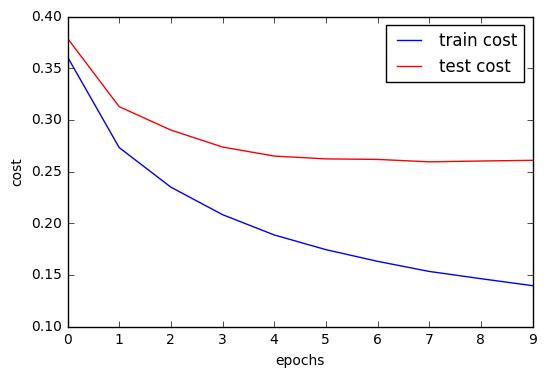

In [42]:
plt.plot(train_data_cost, c='b', label='train cost')
plt.plot(test_data_cost, c='r',label='test cost')
plt.xlabel("epochs")
plt.ylabel("cost")
plt.legend()
plt.show()

## 学習精度のグラフ

エポックごとに学習精度が向上していく様子をプロットする。

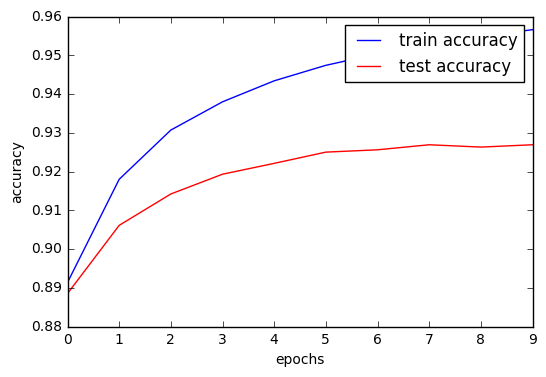

In [43]:
plt.plot(train_data_acc, c='b', label='train accuracy')
plt.plot(test_data_acc, c='r', label='test accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## おつかれさまでした

以上で、TensorFlowチュートリアル終了です。これまでの演習で行なったPythonとNumpyだけで実装したコードと比べるとはるかに短いコード量でニューラルネットワークのモデルを構築することができたと思います。スクラッチでの実装からフレームワークによる実装を知っておくことで、トラブル原因の把握やデバッグ作業、開発コストを極端に抑えることができることでしょう。TensorFlowには上記で紹介した内容以外にもたくさんの手法が用意されています。最適化や正則化などの手法を簡単に実装することができます。ぜひ利用してみてください。